In [5]:
import matplotlib.pyplot as plt
import os
import sys
import inspect

os.chdir(r'/home/or/dev/Face-Recognition-Of-Masked-Faces')

from create_masks import load_3dmm
from config_file import config, SUNGLASSES_MASK_NAME, COVID19_MASK_NAME, CENTER_FACE_PART
from masks_indices import get_lens, get_mask_string, get_sunglasses_left_eye
from masks_indices import make_sunglasses_mask, make_covid19_mask, make_hat_mask, make_eye_mask

In [6]:
# Get 3D model
verts, vertsr = load_3dmm()
x=vertsr[:,0];y=vertsr[:,1];z=vertsr[:,2];

In [7]:
right_lens_inds, left_lens_inds, sunglasses_strings_ind = make_sunglasses_mask(x, y)
covid19_mask_ind, covid19_strings_ind = make_covid19_mask(x, y, z)
hat_inds = make_hat_mask(x, y)
eyes_ind = make_eye_mask(x, y)
eye_mask_openning_ind = [ii for ii, cord in enumerate(z) if (cord >= 0)]

In [8]:
# # fig, ax = plt.subplots(figsize=(20,20))
# legend_font_size = 10
# legend_loc = "lower left"
# rows,cols = 2, 2
# fig, axis = plt.subplots(rows,cols,figsize=(10,10))
# rest_color = 'peru'

# # sunglasses
# axis[0][0].set_title('Sunglasses mask')
# axis[0][0].scatter(x,y,s=1, color=rest_color)
# axis[0][0].scatter(x[right_lens_inds],y[right_lens_inds],color='r')
# axis[0][0].scatter(x[left_lens_inds],y[left_lens_inds],color='r')
# axis[0][0].scatter(x[sunglasses_strings_ind],y[sunglasses_strings_ind],color='g')
# axis[0][0].legend(['\"rest\" areas','\"additional\" areas','\"main\" areas'],
#            loc=legend_loc, ncol=1,prop={'size': legend_font_size})
# leg = axis[0][0].get_legend()
# leg.legendHandles[0].set_color(rest_color)
# leg.legendHandles[1].set_color('green')
# leg.legendHandles[2].set_color('red')

# # hat
# axis[0][1].set_title('Hat mask')
# axis[0][1].scatter(x,y,s=1,color=rest_color)
# axis[0][1].scatter(x[hat_inds],y[hat_inds],color='r')
# axis[0][1].legend(['\"rest\" areas','\"main\" areas'],                  
#            loc=legend_loc, ncol=1,prop={'size': legend_font_size})
# leg = axis[0][1].get_legend()
# leg.legendHandles[0].set_color(rest_color)
# leg.legendHandles[1].set_color('red')

# # Eye
# axis[1][0].set_title('Eye mask')
# axis[1][0].scatter(x,y,color=rest_color, s=0.1)
# axis[1][0].scatter(x[eye_mask_openning_ind],y[eye_mask_openning_ind],color='r', s=0.2)
# axis[1][0].scatter(x[eyes_ind],y[eyes_ind],color=rest_color, s=0.2)
# axis[1][0].legend(['\"rest\" areas','\"main\" areas'],
#            loc=legend_loc, ncol=1,prop={'size': legend_font_size})
# leg = axis[1][0].get_legend()
# leg.legendHandles[0].set_color('red')
# leg.legendHandles[1].set_color(rest_color)

# # covid19
# axis[1][1].set_title('Covid19 mask')
# axis[1][1].scatter(x,y,s=1, color='peru')
# axis[1][1].scatter(x[covid19_mask_ind],y[covid19_mask_ind],color='r')
# axis[1][1].scatter(x[covid19_strings_ind],y[covid19_strings_ind],color='g')
# axis[1][1].legend(['\"rest\" areas','\"additional\" areas','\"main\" areas'],
                  
#            loc=legend_loc, ncol=1,prop={'size': legend_font_size})
# leg = axis[1][1].get_legend()
# leg.legendHandles[0].set_color('peru')
# leg.legendHandles[1].set_color('green')
# leg.legendHandles[2].set_color('red')

# plt.show()

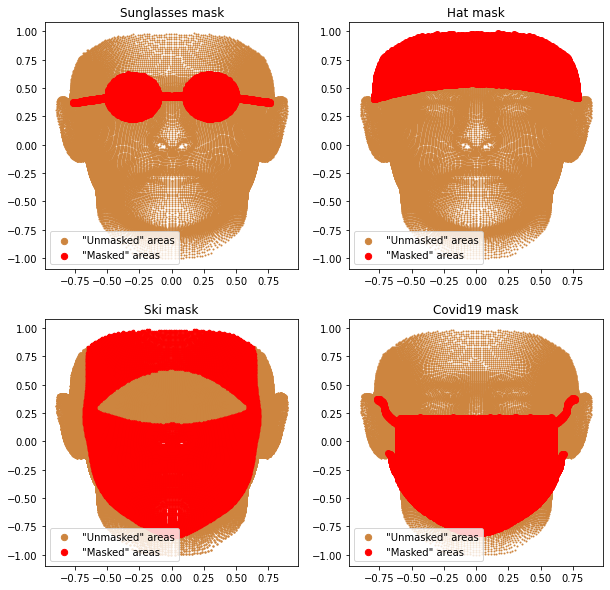

In [41]:
# fig, ax = plt.subplots(figsize=(20,20))
legend_font_size = 10
legend_loc = "lower left"
rows,cols = 2, 2
fig, axis = plt.subplots(rows,cols,figsize=(10,10))
Unmasked_color = 'peru'

# sunglasses
axis[0][0].set_title('Sunglasses mask')
axis[0][0].scatter(x,y,s=1, color=Unmasked_color)
axis[0][0].scatter(x[right_lens_inds],y[right_lens_inds],color='r')
axis[0][0].scatter(x[left_lens_inds],y[left_lens_inds],color='r')
axis[0][0].scatter(x[sunglasses_strings_ind],y[sunglasses_strings_ind],color='r')
axis[0][0].legend(['\"Unmasked\" areas','\"Masked\" areas'],
           loc=legend_loc, ncol=1,prop={'size': legend_font_size})
leg = axis[0][0].get_legend()
leg.legendHandles[0].set_color(Unmasked_color)
leg.legendHandles[1].set_color('red')
leg.legendHandles[0]._sizes  = [40]
leg.legendHandles[1]._sizes  = [40]

# hat
axis[0][1].set_title('Hat mask')
axis[0][1].scatter(x,y,s=1,color=Unmasked_color)
axis[0][1].scatter(x[hat_inds],y[hat_inds],color='r')
axis[0][1].legend(['\"Unmasked\" areas','\"Masked\" areas'],                  
           loc=legend_loc, ncol=1,prop={'size': legend_font_size})
leg = axis[0][1].get_legend()
leg.legendHandles[0].set_color(Unmasked_color)
leg.legendHandles[1].set_color('red')
leg.legendHandles[0]._sizes  = [40]
leg.legendHandles[1]._sizes  = [40]

# Eye
axis[1][0].set_title('Ski mask')
axis[1][0].scatter(x,y,color=Unmasked_color, s=2.2)
axis[1][0].scatter(x[eye_mask_openning_ind],y[eye_mask_openning_ind],color='r', s=7)
axis[1][0].scatter(x[eyes_ind],y[eyes_ind],color=Unmasked_color, s=7)
axis[1][0].legend(['\"Unmasked\" areas','\"Masked\" areas'],
           loc=legend_loc, ncol=1,prop={'size': legend_font_size})
leg = axis[1][0].get_legend()
leg.legendHandles[0].set_color(Unmasked_color)
leg.legendHandles[1].set_color('red')
leg.legendHandles[0]._sizes  = [40]
leg.legendHandles[1]._sizes  = [40]

# covid19
axis[1][1].set_title('Covid19 mask')
axis[1][1].scatter(x,y,s=1, color='peru')
axis[1][1].scatter(x[covid19_mask_ind],y[covid19_mask_ind],color='r')
axis[1][1].scatter(x[covid19_strings_ind],y[covid19_strings_ind],color='r')
axis[1][1].legend(['\"Unmasked\" areas','\"Masked\" areas'], 
           loc=legend_loc, ncol=1,prop={'size': legend_font_size})
leg = axis[1][1].get_legend()#prop={'size': 16})

leg.legendHandles[0].set_color('peru')
leg.legendHandles[1].set_color('red')
leg.legendHandles[0]._sizes  = [40]
leg.legendHandles[1]._sizes  = [40]

plt.show()